In [43]:
import os
import numpy as np
from matplotlib import colors, cm
import matplotlib.pyplot as plt
import rasterio
import pyproj
import pandas as pd 
from rasterio.plot import show, show_hist
import richdem as rd
from matplotlib_scalebar.scalebar import ScaleBar

def hex_to_RGB(hex_str):
    """#FFFFFF -> [255,255,255]"""
    # Pass 16 to the integer function for change of base
    return [int(hex_str[i : i + 2], 16) for i in range(1, 6, 2)]



In [44]:

c = 'ldg'
dem = rasterio.open(f'/home/hma000/storage/terrain_exp/dem_processed/{c}/{c}_dem_10m_clip.tif')
slope = rasterio.open(f'/home/hma000/storage/terrain_exp/dem_processed/{c}/{c}_dem_10m_slope.tif')
aspect = rasterio.open(f'/home/hma000/storage/terrain_exp/dem_processed/{c}/{c}_dem_10m_aspect.tif')
twi = rasterio.open(f'/home/hma000/storage/terrain_exp/dem_processed/{c}/{c}_dem_10m_twi.tif')
con = rasterio.open(f'/home/hma000/storage/terrain_exp/dem_processed/{c}/{c}_dem_10m_con.tif')

# df = pd.read_csv('/home/hma000/storage/terrain_exp/ykl_coords.csv', usecols=['name','lon','lat'])
# df["clust"] = df["name"].str[:2]
# df.clust.replace(["RO", "Bu", "NG"], "ld", inplace=True)
# df.clust = [i.lower() for i in df.clust]

## ELEVATION

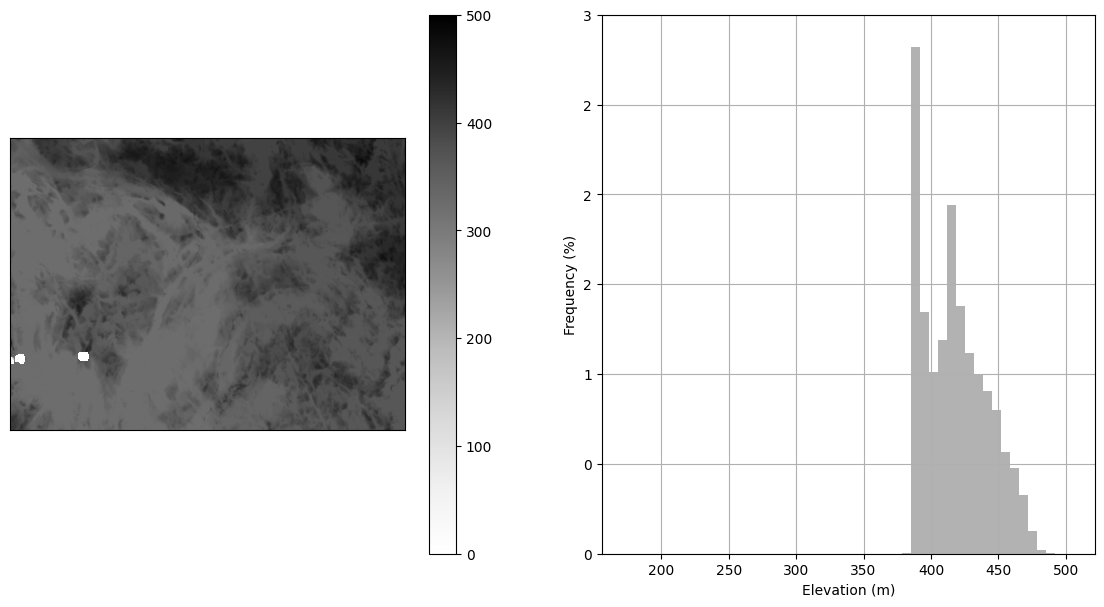

<Figure size 640x480 with 0 Axes>

In [45]:

fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))

data = dem.read()
data[data < 0] = np.nan


# MAP OF VALUES
cmap = plt.get_cmap('Greys')
show(data, ax=axrgb, cmap=cmap)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=500), cmap=cmap), ax=axrgb)
axrgb.set_yticks([])
axrgb.set_xticks([])


# HISTOGRAM 
kwargs={'facecolor':'black'}
show_hist(data, bins=50, histtype='stepfilled',density=1,
          lw=0.0, stacked=False, alpha=0.3, ax=axhist, **kwargs)
axhist.set_yticks(ticks=axhist.get_yticks(), labels=[round(i*100) for i in axhist.get_yticks()])
axhist.set_ylabel("Frequency (%)")
axhist.get_legend().remove()
axhist.set_xlabel("Elevation (m)")
axhist.set_title('')

plt.savefig(f'/home/hma000/accomatic-web/plotting/out/dem/{c}elevation.png',transparent=True)

plt.show()
plt.clf()

## SLOPE

In [46]:
data = slope.read()
data[data < 0] = np.nan

fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))

cmap = plt.get_cmap('copper_r')
show(data, transform=dem.transform, ax=axrgb, cmap=cmap)
axrgb.set_yticks([])
axrgb.set_xticks([])

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=30), cmap=cmap), ax=axrgb)

kwargs = {'facecolor':'#fc6600'}
show_hist(data, bins=50, histtype='stepfilled',density=1,
          lw=0.0, stacked=False, alpha=0.3, ax=axhist, **kwargs)
axhist.set_yticks(ticks=axhist.get_yticks(), labels=[round(i*100) for i in axhist.get_yticks()])
axhist.get_legend().remove()
axhist.set_ylabel("Frequency (%)")
axhist.set_xlabel("Slope (degree)")
axhist.set_title('')

plt.savefig(f'/home/hma000/accomatic-web/plotting/out/dem/{c}slope.png',transparent=True)

# plt.show()
plt.clf()


<Figure size 1400x700 with 0 Axes>

## ASPECT

In [47]:

data = aspect.read()
data[data < 0] = np.nan

fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
# twilight is nice 

clist = ['#fde8b6', '#cabda2', '#97928d', '#646878', '#313d64', '#313d64', '#646878', '#97928d', '#cabda2', '#fde8b6']
CustomCmap = colors.ListedColormap([tuple(hex_to_RGB(i)) for i in clist])

cmap = plt.get_cmap(CustomCmap)
show(data, transform=dem.transform, ax=axrgb, cmap=cmap)

axrgb.set_yticks([])
axrgb.set_xticks([])


fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data)), cmap=cmap), ax=axrgb)

kwargs = {'facecolor':'Orange'}
show_hist(data, bins=50, histtype='stepfilled',density=1,
          lw=0.0, stacked=False, alpha=0.3, ax=axhist, **kwargs)
axhist.set_yticks(ticks=axhist.get_yticks(), labels=[round(i*100, 2) for i in axhist.get_yticks()])
axhist.get_legend().remove()
axhist.set_xlabel("Aspect (degree)")
axhist.set_ylabel("Frequency (%)")
axhist.set_title('')

# plt.show()
plt.savefig(f'/home/hma000/accomatic-web/plotting/out/dem/{c}aspect.png',transparent=True)
plt.clf()


<Figure size 1400x700 with 0 Axes>

## TWI

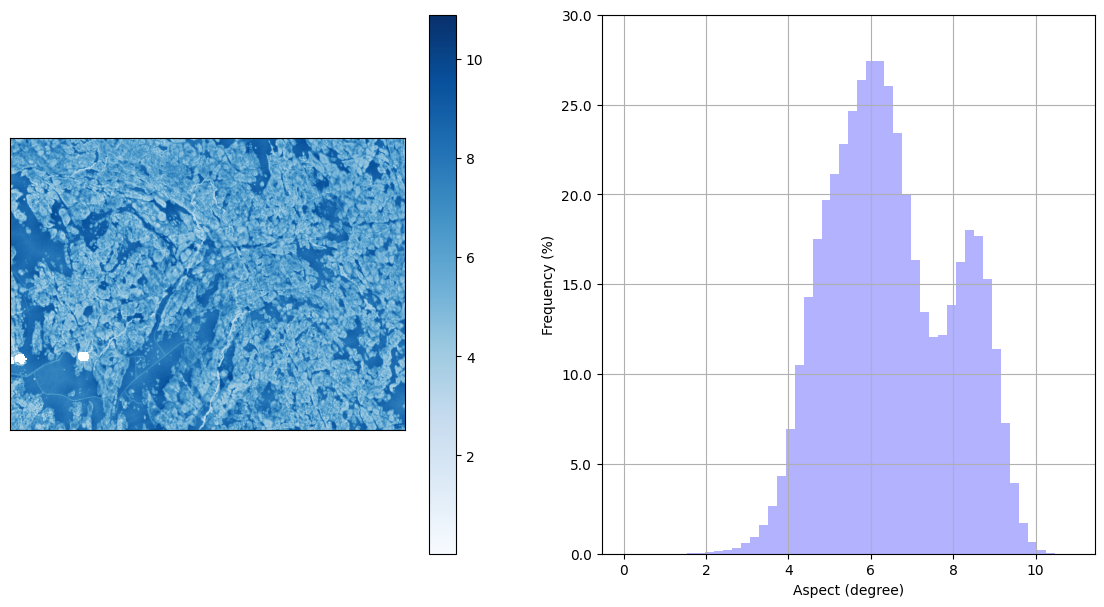

<Figure size 640x480 with 0 Axes>

In [49]:


data = twi.read()
data[data < 0] = np.nan

fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
# twilight is nice 

show(data, transform=dem.transform, ax=axrgb, cmap='Blues')

axrgb.set_yticks([])
axrgb.set_xticks([])


fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data)), cmap='Blues'), ax=axrgb)

kwargs = {'facecolor':'Blue'}
show_hist(data, bins=50, histtype='stepfilled',density=1,
          lw=0.0, stacked=False, alpha=0.3, ax=axhist, **kwargs)
axhist.set_yticks(ticks=axhist.get_yticks(), labels=[round(i*100, 2) for i in axhist.get_yticks()])
axhist.get_legend().remove()
axhist.set_xlabel("Aspect (degree)")
axhist.set_ylabel("Frequency (%)")
axhist.set_title('')

plt.show()
plt.savefig(f'/home/hma000/accomatic-web/plotting/out/dem/{c}twi.png',transparent=True)
plt.clf()


## CON

/tmp/ipykernel_28403/3745223998.py:18: RuntimeWarning: All-NaN slice encountered
  fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data)), cmap='Greys'), ax=axrgb)
/home/hma000/.conda/envs/acco/lib/python3.9/site-packages/rasterio/plot.py:259: RuntimeWarning: All-NaN slice encountered
  rng = np.nanmin(arr), np.nanmax(arr)


ValueError: supplied range of [nan, nan] is not finite

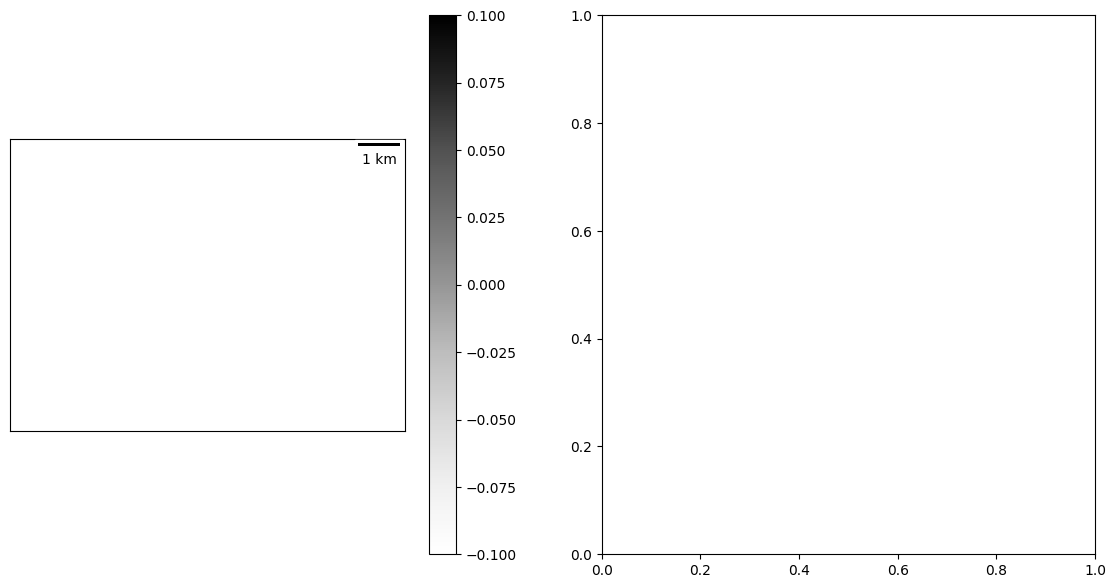

In [52]:

data = con.read()
data[data < 0] = np.nan
data = (data - np.amin(data)) / (np.amax(data) - np.amin(data))


fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
# twilight is nice 

show(data, transform=dem.transform, ax=axrgb, cmap='Greys')

scalebar = ScaleBar(0.2) # 1 pixel = 0.2 meter
axrgb.add_artist(scalebar)

axrgb.set_yticks([])
axrgb.set_xticks([])


fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data)), cmap='Greys'), ax=axrgb)

kwargs = {'facecolor':'Grey'}
show_hist(data, bins=50, histtype='stepfilled',density=1,
          lw=0.0, stacked=False, alpha=0.3, ax=axhist, **kwargs)
axhist.set_yticks(ticks=axhist.get_yticks(), labels=[round(i*100, 2) for i in axhist.get_yticks()])
axhist.get_legend().remove()
axhist.set_xlabel("Curvature")
axhist.set_ylabel("Frequency (%)")
axhist.set_title('')


plt.show()
plt.savefig(f'/home/hma000/accomatic-web/plotting/out/dem/{c}con.png',transparent=True)
plt.clf()

## AXES

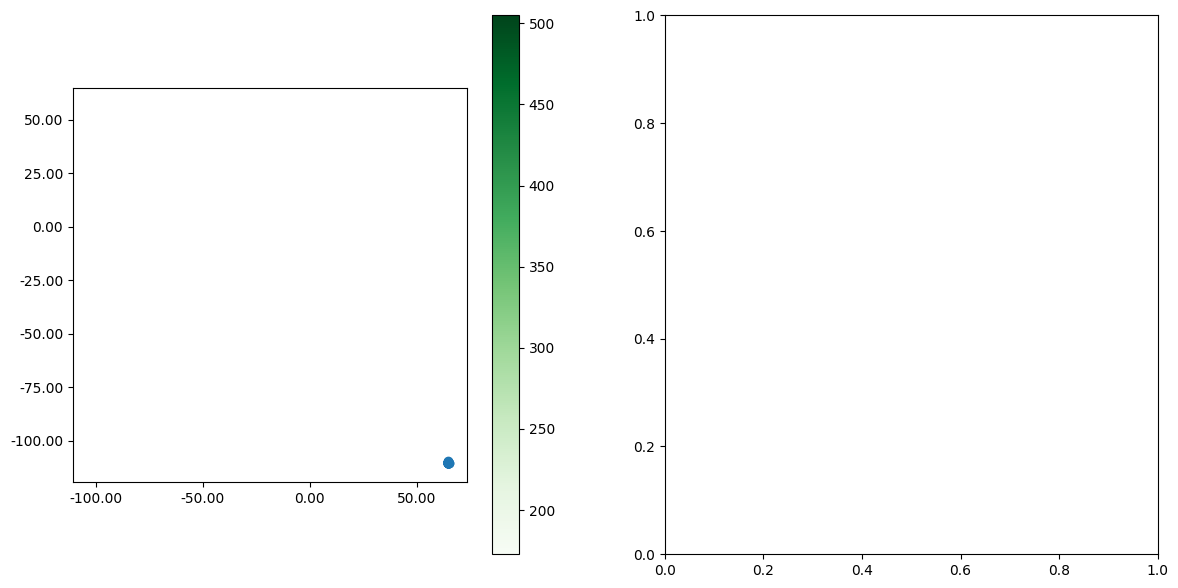

In [ ]:

from matplotlib.ticker import FormatStrFormatter

dem = rasterio.open(f'/home/hma000/storage/terrain_exp/dem_processed/{c}/{c}_dem_10m_clip.tif')
ref = rasterio.open(f'/home/hma000/storage/map_making/tif/{c}_dem_2m_clip.wgs84.tif')

fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))

show(dem.read(1), transform=ref.transform, ax=axrgb)

axrgb.set_xticks(axrgb.get_xticks()[1:-1:2])
axrgb.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axrgb.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data)), cmap='Greens'), ax=axrgb)
plt.savefig(f'/home/hma000/accomatic-web/plotting/out/dem/{c}axes.png',transparent=True)